# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
# Import API key
from config import api_key
from scipy.stats import linregress

## Generate Cities List

In [44]:
# Import City py
from citipy import citipy
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat_lng_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lat_lng_list.append(lat_lng)

#List all the cities in dataframe 
city_dataframe = pd.DataFrame(cities)
city_df = city_dataframe.rename(columns={0: 'city'}) 

#Add lat and lngs to dataframe, create separate columns for lats and longs
city_df['lat_lngs'] = lat_lng_list
city_df['lat'] = city_df.lat_lngs.map(lambda x: str(x[0]))
city_df['long'] = city_df.lat_lngs.map(lambda x: str(x[1]))

city_df.head()


,city,lat_lngs,lat,long
0,vuktyl,"(63.10809232150973, 57.87330647544081)",63.10809232150973,57.87330647544081
1,cherskiy,"(69.22693753922348, 160.50805212930874)",69.22693753922348,160.50805212930874
2,sibolga,"(-2.0661425629244974, 94.73094452038333)",-2.0661425629244974,94.73094452038333
3,qaanaaq,"(89.63024225611201, -90.86782198663141)",89.63024225611201,-90.86782198663141
4,jumla,"(33.93265591150626, 83.86672475105291)",33.93265591150626,83.86672475105291


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [45]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


#Lists for holding variables
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#Initiate count for city number below
count = 1

print(f"Beginning Data Retrieval")   
print("-"*40)

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        
        print(f"Processing Record {count} | {city}") 
        
        count += 1
   
    except:
        print(f"City not found. Skipping...")
        continue
print("-"*40)
print(f"Data Retrieval Complete")   
print("-"*40)

Beginning Data Retrieval
----------------------------------------
Processing Record 1 | vuktyl
Processing Record 2 | cherskiy
Processing Record 3 | sibolga
Processing Record 4 | qaanaaq
Processing Record 5 | jumla
Processing Record 6 | ancud
Processing Record 7 | bredasdorp
Processing Record 8 | sorland
Processing Record 9 | new norfolk
Processing Record 10 | luchegorsk
Processing Record 11 | sao joao da barra
Processing Record 12 | berdigestyakh
Processing Record 13 | san jeronimo
City not found. Skipping...
Processing Record 14 | sayan
Processing Record 15 | avarua
Processing Record 16 | keti bandar
Processing Record 17 | port alfred
Processing Record 18 | sabzevar
Processing Record 19 | santa maria
Processing Record 20 | ushuaia
Processing Record 21 | mecca
Processing Record 22 | salalah
Processing Record 23 | severo-kurilsk
Processing Record 24 | hobart
Processing Record 25 | radviliskis
Processing Record 26 | ribeira grande
Processing Record 27 | nakuru
Processing Record 28 | leni

City not found. Skipping...
Processing Record 232 | soyo
Processing Record 233 | sivaki
Processing Record 234 | yellowknife
Processing Record 235 | kalaleh
Processing Record 236 | siguiri
Processing Record 237 | garden city
Processing Record 238 | cockburn town
Processing Record 239 | guerrero negro
Processing Record 240 | lantawan
Processing Record 241 | port keats
Processing Record 242 | macklin
Processing Record 243 | bocas del toro
Processing Record 244 | pacific grove
Processing Record 245 | khatanga
Processing Record 246 | salvacion
Processing Record 247 | sur
Processing Record 248 | biak
Processing Record 249 | kutum
Processing Record 250 | boyolangu
Processing Record 251 | bonthe
Processing Record 252 | seryshevo
Processing Record 253 | puerto ayacucho
Processing Record 254 | pahrump
Processing Record 255 | marawi
Processing Record 256 | tra vinh
Processing Record 257 | ambilobe
Processing Record 258 | richards bay
Processing Record 259 | cabedelo
Processing Record 260 | saint 

Processing Record 463 | port moresby
Processing Record 464 | kunya
Processing Record 465 | dingle
Processing Record 466 | tezu
Processing Record 467 | beidao
City not found. Skipping...
Processing Record 468 | florida
Processing Record 469 | gizo
Processing Record 470 | bodden town
Processing Record 471 | champerico
Processing Record 472 | urumqi
Processing Record 473 | ballina
Processing Record 474 | shkurinskaya
Processing Record 475 | esperance
Processing Record 476 | itoman
Processing Record 477 | severomuysk
Processing Record 478 | calabozo
Processing Record 479 | laguna
Processing Record 480 | emba
Processing Record 481 | bonavista
Processing Record 482 | beysehir
Processing Record 483 | komsomolskiy
Processing Record 484 | sulangan
Processing Record 485 | eha amufu
Processing Record 486 | tongchuan
Processing Record 487 | limot
Processing Record 488 | hanumangarh
Processing Record 489 | half moon bay
Processing Record 490 | sulecin
Processing Record 491 | mogadishu
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create data frame of all the data 
weather_data = pd.DataFrame(weather_dict)
weather_data.head()
# Save data frame to CSV
#weather_data.to_csv('weather_data.csv')

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vuktyl,100,RU,1616497877,90,63.8567,57.3094,31.42,10.13
1,Cherskiy,100,RU,1616497877,89,68.7500,161.3000,7.65,10.87
2,Sibolga,99,ID,1616497713,86,1.7427,98.7792,78.49,0.34
3,Qaanaaq,93,GL,1616497878,66,77.4840,-69.3632,-17.84,7.92
4,Jumla,100,NP,1616497878,40,29.2747,82.1838,58.10,4.99


In [114]:
weather_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,588.000000,5.880000e+02,588.000000,588.000000,588.000000,588.000000,588.000000
mean,56.052721,1.616498e+09,68.688776,19.447957,22.111910,57.832381,8.242330
std,37.879693,1.037790e+02,23.753778,33.406777,88.407975,26.840216,5.877175
min,0.000000,1.616498e+09,1.000000,-54.800000,-179.166700,-31.380000,0.270000
25%,20.000000,1.616498e+09,55.000000,-8.539950,-54.409400,40.757500,4.045000
50%,67.000000,1.616498e+09,74.000000,22.728800,27.880400,62.735000,6.910000
75%,91.000000,1.616498e+09,87.000000,47.901425,100.206275,79.352500,10.875000
max,100.000000,1.616498e+09,100.000000,78.218600,179.316700,104.830000,33.550000


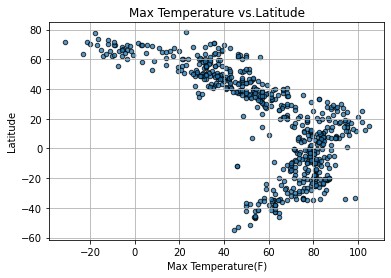

In [47]:
#Temperature (F) vs. Latitude
plt.scatter( weather_data["Max Temp"],weather_data["Lat"], marker="o",s=20,alpha=.75, edgecolors="k")

plt.title("Max Temperature vs.Latitude")
plt.ylabel("Latitude")
plt.xlabel("Max Temperature(F)")
plt.grid(True)

plt.savefig("Max Temperature(F) vs Latitude.png")
plt.show()

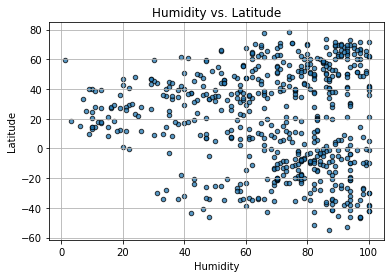

In [48]:
#Humidity (%) vs. Latitude
plt.scatter(weather_data["Humidity"],weather_data["Lat"], marker="o", s=20,alpha=.75, edgecolors="k")
plt.title("Humidity vs. Latitude")
plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.grid(True)

plt.savefig("Humidity vs Latitude.png")
plt.show()

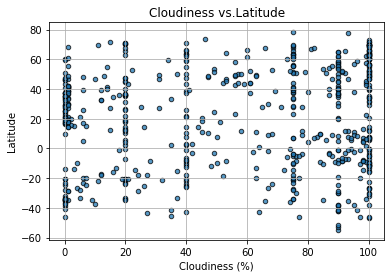

In [49]:
#Cloudiness (%) vs. Latitude
plt.scatter( weather_data["Cloudiness"],weather_data["Lat"], marker="o", s=20,alpha=.75, edgecolors="k")
plt.title("Cloudiness vs.Latitude")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Cloudiness vs Latitude.png")
plt.show()

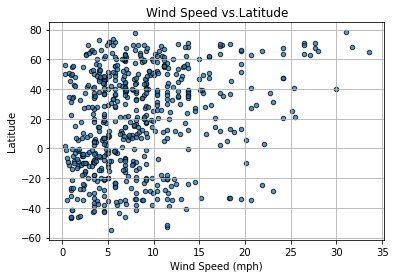

In [128]:
#Wind Speed (mph) vs. Latitude

plt.scatter(weather_data["Wind Speed"],weather_data["Lat"], marker="o", s=20,alpha=.75, edgecolors="k")
plt.title("Wind Speed vs.Latitude")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Wind Speed vs Latitude .png")
plt.show()

In [51]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]

northern_hemisphere

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vuktyl,100,RU,1616497877,90,63.8567,57.3094,31.42,10.13
1,Cherskiy,100,RU,1616497877,89,68.7500,161.3000,7.65,10.87
2,Sibolga,99,ID,1616497713,86,1.7427,98.7792,78.49,0.34
3,Qaanaaq,93,GL,1616497878,66,77.4840,-69.3632,-17.84,7.92
4,Jumla,100,NP,1616497878,40,29.2747,82.1838,58.10,4.99
...,...,...,...,...,...,...,...,...,...
581,Houndé,100,BF,1616498056,18,11.5000,-3.5167,94.57,5.14
582,Busembatia,64,UG,1616498056,20,0.7697,33.6131,94.82,6.60
583,Marzuq,1,YE,1616498056,10,14.4000,46.4667,88.39,9.84
586,Anadyr,90,RU,1616498057,92,64.7500,177.4833,14.00,33.55


In [118]:
# Define function for creating linear agression and scatter plot

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig,pltfile):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    #plt.savefig("output.png")
    plt.savefig(pltfile)
    plt.show()

The r-squared is: -0.8748011308945487


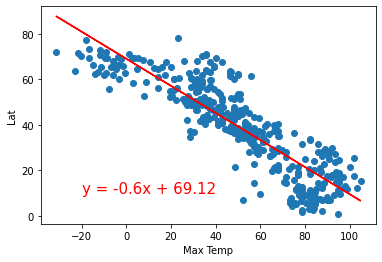

In [120]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
xlbl = "Max Temp"
ylbl =  "Lat"
lblpos = (-20,10)
pltfile = "NH_temp_lat.png"
plotLinearRegression(northern_hemisphere["Max Temp"],northern_hemisphere["Lat"],xlbl,ylbl,lblpos,5,pltfile)

The r-squared is: 0.5893886353412388


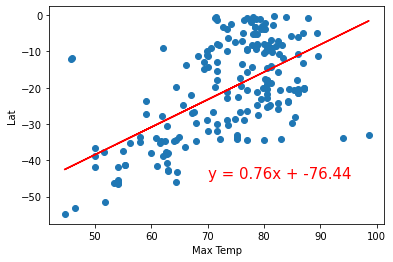

In [121]:
#Southern Hemisphere - Temperature (F) vs. Latitude
xlbl = "Max Temp"
ylbl =  "Lat"
lblpos = (70,-45)
pltfile = "SH_temp_lat.png"
plotLinearRegression(southern_hemisphere['Max Temp'],southern_hemisphere['Lat'],xlbl,ylbl,lblpos,5,pltfile)

The r-squared is: 0.3524193373392753


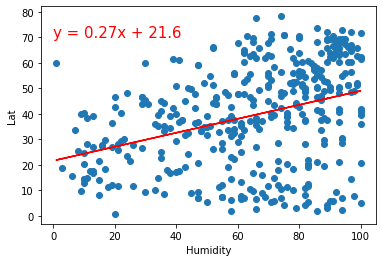

In [122]:
#Northern Hemisphere - Humidity (%) vs. Latitude
xlbl = "Humidity"
ylbl =  "Lat"
lblpos = (0,70)
pltfile = "NH_humidity_lat.png"
plotLinearRegression(northern_hemisphere["Humidity"],northern_hemisphere["Lat"],xlbl,ylbl,lblpos,7,pltfile)


The r-squared is: 0.04075579768065466


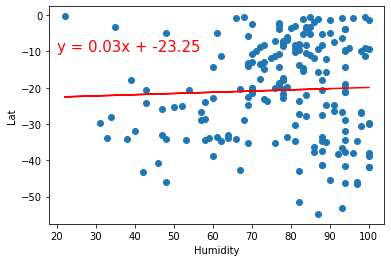

In [123]:
#Southern Hemisphere - Humidity (%) vs. Latitude
xlbl = "Humidity"
ylbl =  "Lat"
lblpos = (20,-10)
pltfile = "SH_humidity_lat.png"
plotLinearRegression(southern_hemisphere["Humidity"],southern_hemisphere["Lat"],xlbl,ylbl,lblpos,7,pltfile)

The r-squared is: 0.21463436860706964


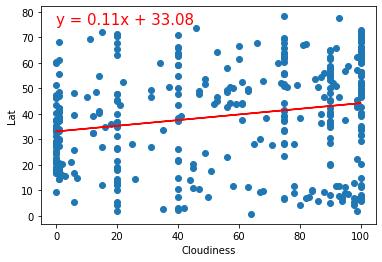

In [124]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
xlbl = "Cloudiness"
ylbl =  "Lat"
lblpos = (0,75)
pltfile = "NH_cloudiness_lat.png"
plotLinearRegression(northern_hemisphere["Cloudiness"],northern_hemisphere["Lat"],xlbl,ylbl,lblpos,5,pltfile)


The r-squared is: 0.23069761061456884


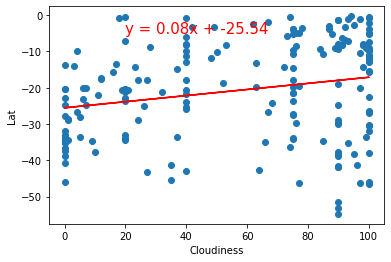

In [125]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
xlbl = "Cloudiness"
ylbl =  "Lat"
lblpos = (20,-5)
pltfile = "SH_cloudiness_lat.png"
plotLinearRegression(southern_hemisphere["Cloudiness"],southern_hemisphere["Lat"],xlbl,ylbl,lblpos,7,pltfile)


The r-squared is: 0.17331518122774411


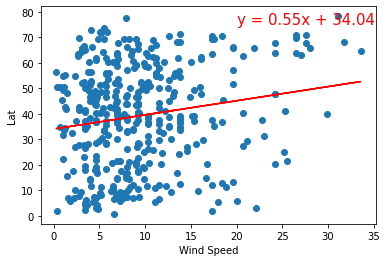

In [126]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
xlbl = "Wind Speed"
ylbl =  "Lat"
lblpos = (20,75)
pltfile = "NH_windspeed_lat.png"
plotLinearRegression(northern_hemisphere["Wind Speed"],northern_hemisphere["Lat"],xlbl,ylbl,lblpos,8,pltfile)

The r-squared is: -0.22107882791739658


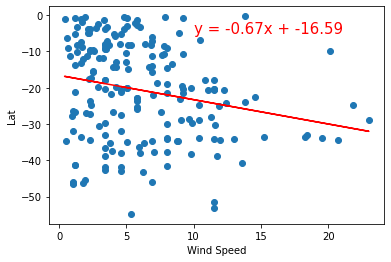

In [127]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
xlbl = "Wind Speed"
ylbl =  "Lat"
lblpos = (10,-5)
pltfile = "SH_windspeed_lat.png"
plotLinearRegression(southern_hemisphere["Wind Speed"],southern_hemisphere["Lat"],xlbl,ylbl,lblpos,7,pltfile)